In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# Paths
silver_path = r"C:\Users\archa\Desktop\Capstone project\Data\Silver"
gold_path = r"C:\Users\archa\Desktop\Capstone project\Data\Gold"
os.makedirs(gold_path, exist_ok=True)


In [2]:
# === GOEMOTIONS GOLD ===
df_goemotions = pd.read_csv(os.path.join(silver_path, "goemotions_cleaned.csv"))

# Emotion columns (dynamic detection)
emotion_cols = df_goemotions.columns[9:]  # first 9 = metadata

# Add: number of emotions and primary emotion
df_goemotions["n_labels"] = df_goemotions[emotion_cols].sum(axis=1)
df_goemotions["primary_emotion"] = df_goemotions[emotion_cols].idxmax(axis=1)
df_goemotions["text_length"] = df_goemotions["text"].apply(lambda x: len(str(x).split()))
df_goemotions["char_length"] = df_goemotions["text"].apply(lambda x: len(str(x)))

# Save
df_goemotions.to_csv(os.path.join(gold_path, "goemotions_gold.csv"), index=False)


In [3]:
# === COUNSELCHAT GOLD ===
df_counsel = pd.read_csv(os.path.join(silver_path, "counselchat_cleaned.csv"))
df_counsel["question_combined"] = df_counsel["questiontitle"].fillna("") + " " + df_counsel["questiontext"].fillna("")
df_counsel["question_length"] = df_counsel["question_combined"].apply(lambda x: len(str(x).split()))
df_counsel["answer_length"] = df_counsel["answertext"].apply(lambda x: len(str(x).split()))
df_counsel.to_csv(os.path.join(gold_path, "counselchat_gold.csv"), index=False)

In [5]:
# Use 'situation' as main input text (adjust if 'empathetic_dialogues' preferred)
df_fb["text_length"] = df_fb["situation"].apply(lambda x: len(str(x).split()))
df_fb["char_length"] = df_fb["situation"].apply(lambda x: len(str(x)))
df_fb["emotion"] = df_fb["emotion"].str.lower().str.strip()

# Save final Gold file
df_fb.to_csv(os.path.join(gold_path, "facebook_gold.csv"), index=False)
print("✅ Facebook gold table saved.")

✅ Facebook gold table saved.


In [11]:
# Load GoEmotions Gold CSV
df_goe = pd.read_csv(os.path.join(gold_path, "goemotions_gold.csv"))

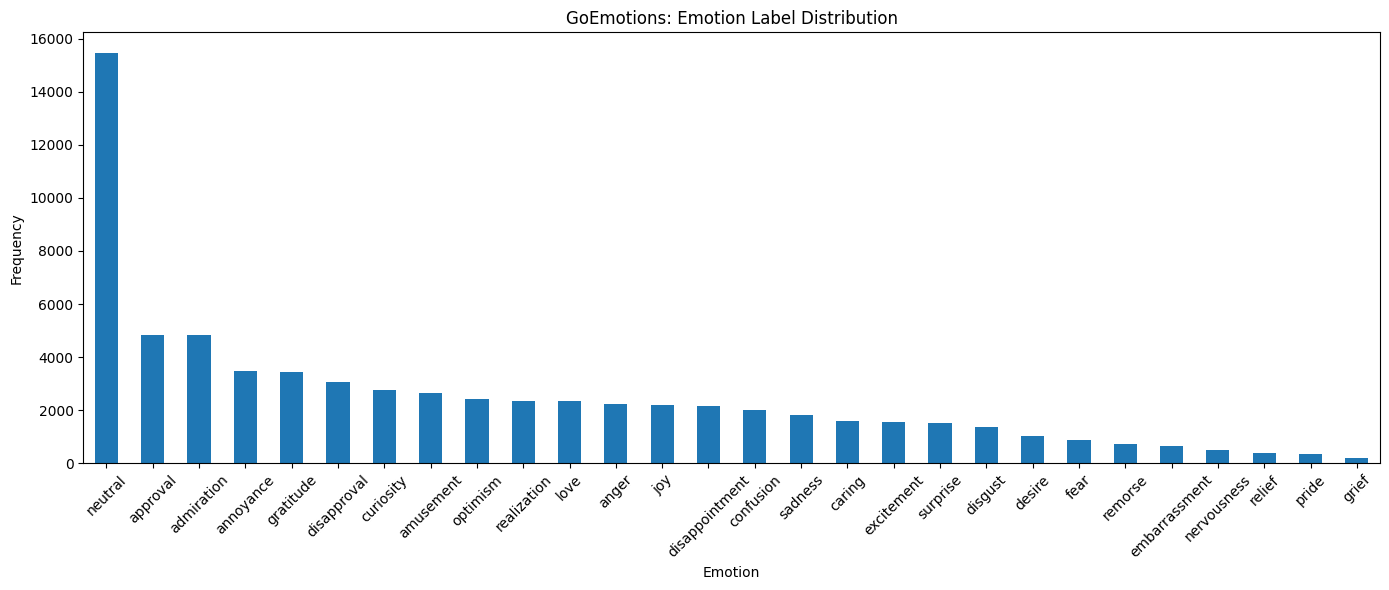

In [12]:
# GoEmotions: Emotion Distribution
plt.figure(figsize=(14, 6))
df_goe[emotion_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("GoEmotions: Emotion Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

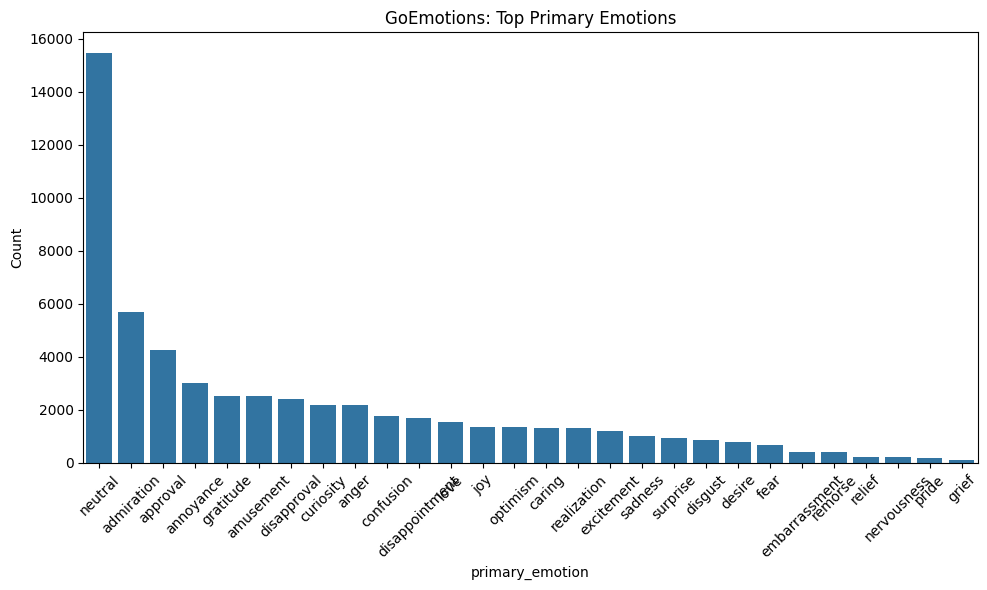

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df_goe, x='primary_emotion', order=df_goe['primary_emotion'].value_counts().index)
plt.title("GoEmotions: Top Primary Emotions")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


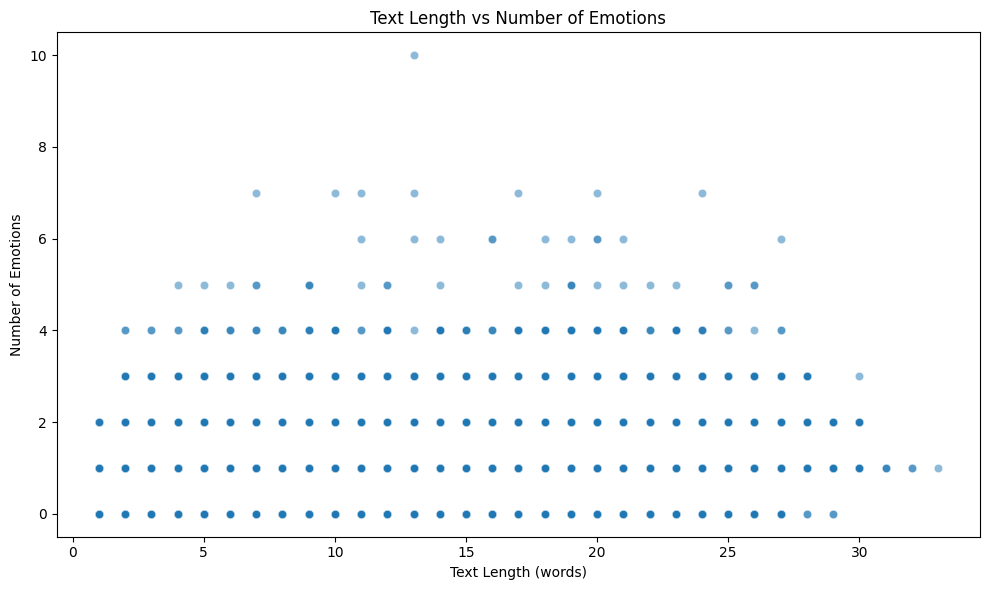

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_goe, x="text_length", y="n_labels", alpha=0.5)
plt.title("Text Length vs Number of Emotions")
plt.xlabel("Text Length (words)")
plt.ylabel("Number of Emotions")
plt.tight_layout()
plt.show()


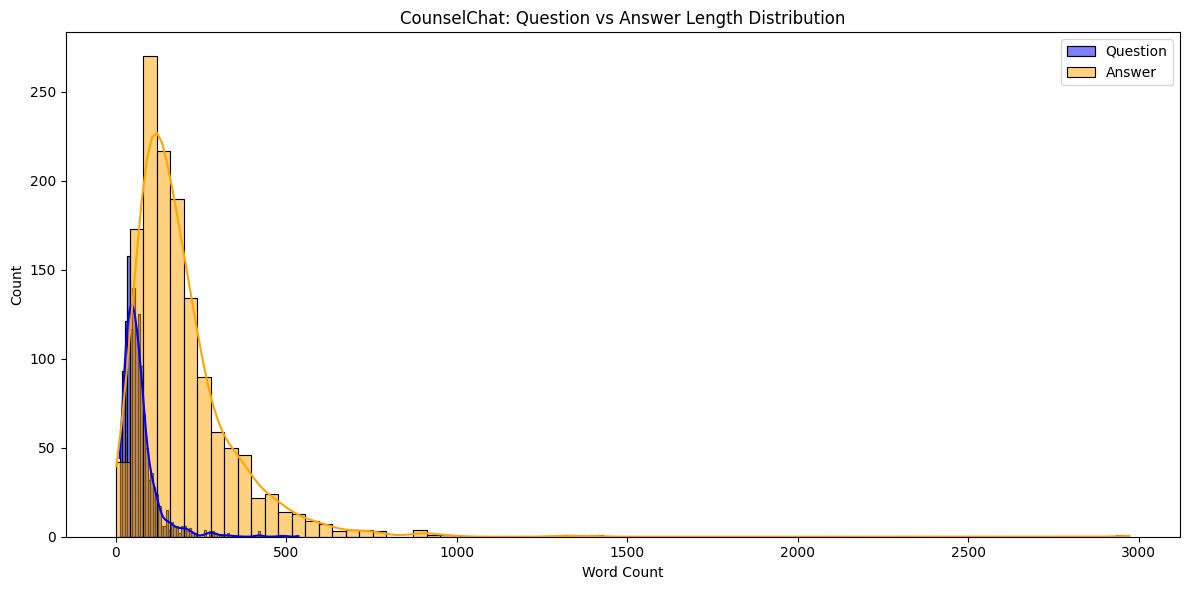

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df_counsel["question_length"], kde=True, label="Question", color='blue')
sns.histplot(df_counsel["answer_length"], kde=True, label="Answer", color='orange')
plt.title("CounselChat: Question vs Answer Length Distribution")
plt.xlabel("Word Count")
plt.legend()
plt.tight_layout()
plt.show()


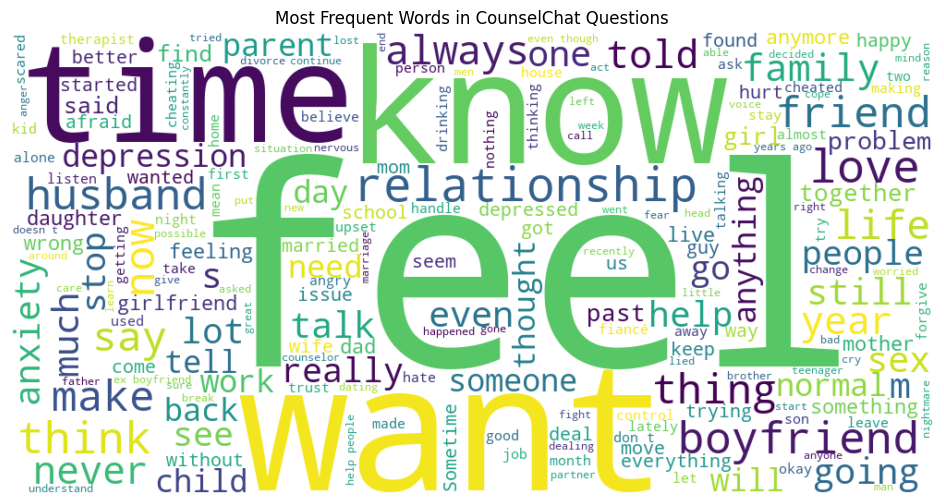

In [19]:
from wordcloud import WordCloud

text_data = ' '.join(df_counsel['question_combined'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_data)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in CounselChat Questions")
plt.show()


In [28]:
print(df_goemotions.columns)


Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral', 'n_labels',
       'primary_emotion', 'text_length', 'char_length'],
      dtype='object')


In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
emotions_encoded = mlb.fit_transform(df_goemotions['emotion'].apply(eval))

co_matrix = pd.DataFrame(emotions_encoded, columns=mlb.classes_).T.dot(emotions_encoded)
plt.figure(figsize=(14, 12))
sns.heatmap(co_matrix, cmap="Blues", annot=False)
plt.title("Emotion Co-occurrence Heatmap (GoEmotions)")
plt.show()



KeyError: 'emotion'